In [2]:
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

C:\Users\koppa\AppData\Local\Temp\ipykernel_31204\2916549231.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [3]:
data=pd.read_csv('Scraping_reviews.csv')

In [4]:
data.head()

,reviews
0,\nlooks awesome but seems that the product is not an original one becoz the serial number on the back is neither matching with the tag nor with the warranty card.\n
1,\nWatch does look much better than the picture in Amazon! Everything is working properly!.\n
2,"\n\n\n\n\n The media could not be loaded.\n \n\n\n\n I agree with everyone, this time piece looks way more beautiful than the photograph. You can't deny being notified with this classic time teller on your wrist.Unless you see it yourself or wear it, you won't completely understand how classy and dependable this is.Right now I'll give it few years to be a part of me.\n"
3,"\nGot the product for Rs.1998, delivery was on time, packaging was good, overall a good looking product. If u r looking for a decent watch, this would be an ideal choice for you\n"
4,"\nI am very happy with this purchase on diwali sale. Excellent design from Titan. Proud to have this one at this price range. I have searched extensively online including titan website for regular wear stylish watches. I have shortlised this one (Blue) and 1766SL02 (black). Though both are good, I have gone for blue. Strongly recommended to buy. Please check your wrist size Vs Dial Dia. It may look big if wrist is thin.\n"


In [5]:
df=data.copy() # Creating a copy of the original data

In [6]:
df['reviews'] = df['reviews'].astype(str).apply(lambda x: x.replace('\n', '')) # To remove '\n' from every review

In [7]:
df.head()

,reviews
0,looks awesome but seems that the product is not an original one becoz the serial number on the back is neither matching with the tag nor with the warranty card.
1,Watch does look much better than the picture in Amazon! Everything is working properly!.
2,"The media could not be loaded. I agree with everyone, this time piece looks way more beautiful than the photograph. You can't deny being notified with this classic time teller on your wrist.Unless you see it yourself or wear it, you won't completely understand how classy and dependable this is.Right now I'll give it few years to be a part of me."
3,"Got the product for Rs.1998, delivery was on time, packaging was good, overall a good looking product. If u r looking for a decent watch, this would be an ideal choice for you"
4,"I am very happy with this purchase on diwali sale. Excellent design from Titan. Proud to have this one at this price range. I have searched extensively online including titan website for regular wear stylish watches. I have shortlised this one (Blue) and 1766SL02 (black). Though both are good, I have gone for blue. Strongly recommended to buy. Please check your wrist size Vs Dial Dia. It may look big if wrist is thin."


In [8]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\koppa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
STOPWORDS = stopwords.words("english") #stopwords are the most common unnecessary words. eg is, he, that, etc.

In [11]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii') # A function to remove emojis from the reviews

In [12]:
import string   
import re

def clean_text(text):
    ps=PorterStemmer()
    
    text=deEmojify(text) # remove emojis
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation
    
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS] # Taking only those words which are not stopwords
    text_cleaned=" ".join([ps.stem(token) for token in tokens])
    
    
    return text_cleaned

In [13]:
df['cleaned_reviews']=df['reviews'].apply(lambda x:clean_text(x))

In [14]:
df.sample(5)

,reviews,cleaned_reviews
4174,Good one.,good one
330,Very good looking very nice awesome perfect look best quality,good look nice awesom perfect look best qualiti
1028,Best,best
3651,"This watch is simply awesome at this price range.Real blue leather, steel dial and overall premium look...",watch simpli awesom price ranger blue leather steel dial overal premium look
1114,The media could not be loaded. Not satisfied ... This is the fake watch,media could load satisfi fake watch


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

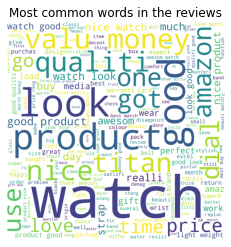

In [16]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(' '.join(df['cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [18]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [19]:
def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound'] # returns the compound score from the dictionary

In [20]:
df['sentiment_score']=df['reviews'].apply(lambda x:compound_score(x)) # applying on the reviews column to get the score

In [21]:
df.sample(5)

,reviews,cleaned_reviews,sentiment_score
3850,Cool thing to gift,cool thing gift,0.6369
2884,Look of watch is fantastic.,look watch fantast,0.5574
3941,I am happy with this watch since I was using it for long run.,happi watch sinc use long run,0.5719
3394,good worth product,good worth product,0.5859
3143,"If you are looking for a formal watch for office purposes, then go for it. It suits to almost all formal dresses. But nothing much to tell about its features.",look formal watch offic purpos go suit almost formal dress noth much tell featur,0.0000


In [22]:
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [23]:
df['review_category']=df['sentiment_score'].apply(lambda x:sentiment_category(x))

In [43]:
df.sample(10)

,reviews,cleaned_reviews,sentiment_score,review_category
2878,The product is very good.quality also very good .if u like formal wear watch u definetly buy this soon I will upload photos,product goodqual also good u like formal wear watch u definetli buy soon upload photo,0.6901,positive
1571,Disappointed 😞😥,disappoint,-0.1901,negative
4316,Great and butiful,great buti,0.6249,positive
3527,n͎o͎t͎ a͎s͎ s͎h͎o͎w͎n͎ i͎n͎ t͎h͎e͎ p͎͎i͎͎c͎͎t͎͎u͎͎r͎͎e͎͎...... b͎u͎t͎ i͎t͎s͎ w͎o͎t͎h͎ f͎o͎r͎ p͎͎r͎͎i͎͎c͎͎e͎͎.....n͎o͎t͎ g͎o͎o͎d͎ e͎n͎o͎u͎g͎h͎ i͎m͎ n͎o͎t͎ s͎a͎t͎i͎s͎f͎i͎e͎d͎ ....a͎s͎ p͎e͎r͎ p͎r͎i͎c͎e͎ i͎ l͎o͎v͎e͎ i͎͎t͎͎.... ❤ g͎o͎ f͎o͎r͎ i͎͎t͎͎.....,shown pictur woth pricenot good enough im satisfi per price love go,0.6369,positive
4315,"Very good product by titan,Edge series is awsm watch is very slim very impressive i jst love this watch",good product titanedg seri awsm watch slim impress jst love watch,0.9052,positive
3388,No screch resistance,screch resist,-0.2960,negative
2874,Banwari lal,banwari lal,0.0000,neutral
2342,"After HMT, titan is first choice for all young generations.This particular model reviewed more times and took this watchreally this very nice looks very good and giving proud for casual and formal wear also.",hmt titan first choic young generationsthi particular model review time took watchreal nice look good give proud casual formal wear also,0.9161,positive
3101,Nice looking branded watch for middle-aged people. Value for money. Only problem I found was it is not waterproof.,nice look brand watch middleag peopl valu money problem found waterproof,0.3612,positive
1241,Lovely watch.. fine quick delivery.. beautiful watch will recommend my friends ty,love watch fine quick deliveri beauti watch recommend friend ty,0.9493,positive


C:\Users\koppa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Reviews Category')

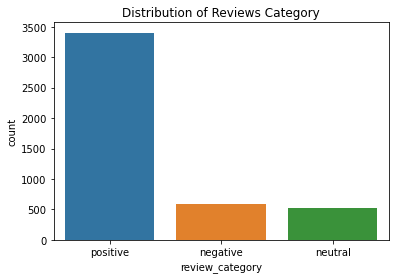

In [25]:
sns.countplot(df['review_category']).set_title("Distribution of Reviews Category")

In [26]:
positive_reviews=df.loc[df['review_category']=='positive','cleaned_reviews'].tolist() # extracting all positive reviews and converting to a list
positive_reviews[0:5]

['look awesom seem product origin one becoz serial number back neither match tag warranti card',
 'watch look much better pictur amazon everyth work properli',
 ' media could load agre everyon time piec look way beauti photograph cant deni notifi classic time teller wristunless see wear wont complet understand classi depend isright ill give year part',
 'got product rs1998 deliveri time packag good overal good look product u r look decent watch would ideal choic',
 'happi purchas diwali sale excel design titan proud one price rang search extens onlin includ titan websit regular wear stylish watch shortlis one blue 1766sl02 black though good gone blue strongli recommend buy pleas check wrist size vs dial dia may look big wrist thin']

In [27]:
negative_reviews=df.loc[df['review_category']=='negative','cleaned_reviews'].tolist() # extracting all negative reviews and converting to a list
negative_reviews[0:5]

['disappoint leather strapi replac first watch strap open side leather past gluewithin 3 day got replac watch modelbut also within 1 day strap open past side took watch repair shop past gluei dont know whether titan give warrante leather provid better leather strapfirst worst experi titan',
 'mention water regist though titan describ detail water regist product mark back metal sideif water regist return buy product rs3246 system goodand mention sl watch get sl logo that matchif sl watch 1766slaa mention 1766sl03 dont know purchas carefullyok',
 'disappoint wheni receiv deliveri packag damag check watch impress thought caus watch bit heavi belt qualiti good',
 'product good amazon ship product work properli unhappi servic product ship amazon useless work properli compeleti dissatisfi type seller product shipment',
 'watch look realli good movement problem skip marker isnt properli align crystal feel rather fragil cheap band issu hair ripper there one micro adjust slot your either take f

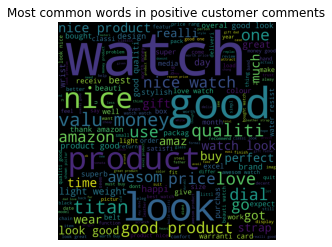

In [28]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='positive','cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in positive customer comments")
plt.axis('off')
plt.show()

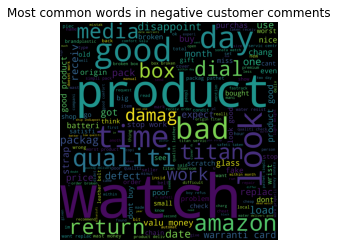

In [29]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='negative','cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in negative customer comments")
plt.axis('off')
plt.show()

In [30]:
from collections import Counter

In [31]:
def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn) # return words with the highest frequencies

In [32]:
top_20_positive_review_words=getMostCommon(positive_reviews,20)

In [33]:
top_20_positive_review_words

[('watch', 1968),
 ('good', 1333),
 ('look', 1114),
 ('product', 989),
 ('nice', 689),
 ('like', 479),
 ('qualiti', 400),
 ('dial', 372),
 ('price', 355),
 ('titan', 320),
 ('money', 310),
 ('love', 301),
 ('', 284),
 ('valu', 270),
 ('amazon', 268),
 ('buy', 262),
 ('gift', 261),
 ('awesom', 247),
 ('use', 244),
 ('one', 240)]

In [34]:
top_20_negative_review_words=getMostCommon(negative_reviews,20)

In [35]:
top_20_negative_review_words

[('watch', 386),
 ('product', 264),
 ('good', 162),
 ('look', 111),
 ('qualiti', 102),
 ('work', 89),
 ('day', 86),
 ('titan', 85),
 ('box', 81),
 ('time', 76),
 ('', 74),
 ('bad', 72),
 ('packag', 68),
 ('amazon', 67),
 ('like', 65),
 ('receiv', 63),
 ('money', 59),
 ('replac', 58),
 ('could', 57),
 ('return', 56)]

In [36]:
def plotMostCommonWords(reviews_list,topn=20,title="Common Review Words",color="blue",axis=None): #default number of words is given as 20
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

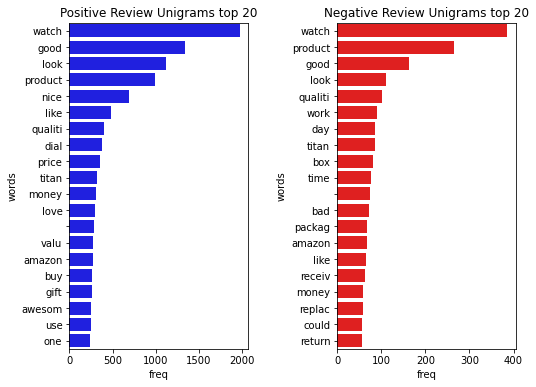

In [37]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews,20,"Positive Review Unigrams",axis=ax[0])

plotMostCommonWords(negative_reviews,20,"Negative Review Unigrams",color="red",axis=ax[1])

In [38]:
def generateNGram(text,n):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [39]:
positive_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in positive_reviews]
negative_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in negative_reviews]

In [40]:
positive_reviews_bigrams[:5]

['look_awesom awesom_seem seem_product product_origin origin_one one_becoz becoz_serial serial_number number_back back_neither neither_match match_tag tag_warranti warranti_card',
 'watch_look look_much much_better better_pictur pictur_amazon amazon_everyth everyth_work work_properli',
 '_media media_could could_load load_agre agre_everyon everyon_time time_piec piec_look look_way way_beauti beauti_photograph photograph_cant cant_deni deni_notifi notifi_classic classic_time time_teller teller_wristunless wristunless_see see_wear wear_wont wont_complet complet_understand understand_classi classi_depend depend_isright isright_ill ill_give give_year year_part',
 'got_product product_rs1998 rs1998_deliveri deliveri_time time_packag packag_good good_overal overal_good good_look look_product product_u u_r r_look look_decent decent_watch watch_would would_ideal ideal_choic',
 'happi_purchas purchas_diwali diwali_sale sale_excel excel_design design_titan titan_proud proud_one one_price price_r

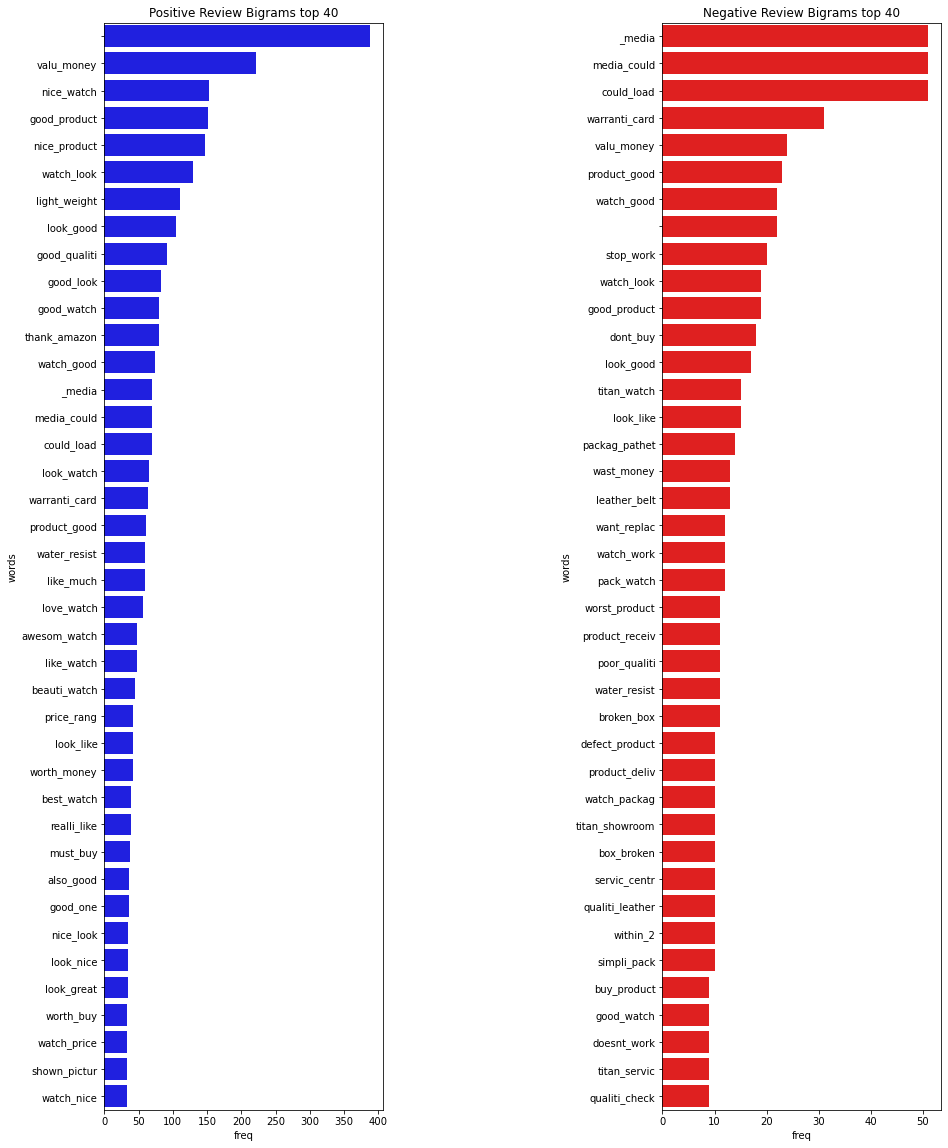

In [41]:
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1)
plotMostCommonWords(positive_reviews_bigrams,40,"Positive Review Bigrams",axis=ax[0])

plotMostCommonWords(negative_reviews_bigrams,40,"Negative Review Bigrams",color="red",axis=ax[1])